Capstone project - Final assignment

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print('Hello Capstone Project Course')

Hello Capstone Project Course


DATA

In [4]:
data_file = 'https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df1 = pd.read_csv(data_file)
df1.head()

C:\Users\AxundzaE\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df1.shape

(194673, 38)

In [6]:
df1.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

METHODOLOGY

In [7]:
df2=df1.drop(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
            'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
            'VEHCOUNT', 'INCDATE',  'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC','INATTENTIONIND','UNDERINFL',
             'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
            'HITPARKEDCAR'], axis=1)

In [8]:
df2.dtypes

SEVERITYCODE     int64
ADDRTYPE        object
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object

Data cleaning - drop NaN

In [9]:
df2.isna().any()

SEVERITYCODE    False
ADDRTYPE         True
WEATHER          True
ROADCOND         True
LIGHTCOND        True
dtype: bool

In [10]:
df2 = df2.dropna()

In [11]:
df2.shape

(187525, 5)

Data cleaning - drop "Unknown"

In [12]:
df2['ADDRTYPE'].value_counts().to_frame()

,ADDRTYPE
Block,123321
Intersection,63462
Alley,742


In [13]:
df2['WEATHER'].value_counts().to_frame()

,WEATHER
Clear,110499
Raining,32976
Overcast,27551
Unknown,14059
Snowing,896
Other,790
Fog/Smog/Smoke,563
Sleet/Hail/Freezing Rain,112
Blowing Sand/Dirt,49
Severe Crosswind,25


In [14]:
df2=df2[df2['WEATHER'] != 'Unknown']

In [15]:
df2['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,112988
Dark - Street Lights On,46937
Dusk,5666
Unknown,2696
Dawn,2428
Dark - No Street Lights,1425
Dark - Street Lights Off,1116
Other,199
Dark - Unknown Lighting,11


In [16]:
df2=df2[df2['LIGHTCOND'] != 'Unknown']

In [17]:
df2['ROADCOND'].value_counts().to_frame()

,ROADCOND
Dry,121233
Wet,46284
Ice,1088
Unknown,989
Snow/Slush,841
Other,105
Standing Water,104
Sand/Mud/Dirt,65
Oil,61


In [18]:
df2=df2[df2['ROADCOND'] != 'Unknown']

In [19]:
df2['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,114074
2,55707


EXPLORATORY ANALYSIS

In [20]:
from sklearn.utils import resample
df_severity1 = df2[ df2["SEVERITYCODE"] == 1]
df_severity2 = df2[ df2["SEVERITYCODE"] == 2]
df_severity1_downsampled = resample(df_severity1, 
                                   replace=False,
                                   n_samples=55707,  
                                   random_state=123)
df3 = pd.concat([df_severity1_downsampled, df_severity2])

In [21]:
df3.reset_index(drop=True, inplace=True)

In [22]:
df3['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
2,55707
1,55707


In [23]:
df3.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND
0,1,Block,Raining,Wet,Daylight
1,1,Block,Clear,Dry,Daylight
2,1,Block,Clear,Dry,Daylight
3,1,Block,Clear,Dry,Daylight
4,1,Block,Clear,Dry,Daylight


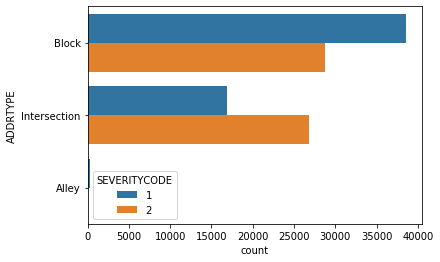

In [24]:
ax = sns.countplot(y="ADDRTYPE", hue="SEVERITYCODE", data=df3)

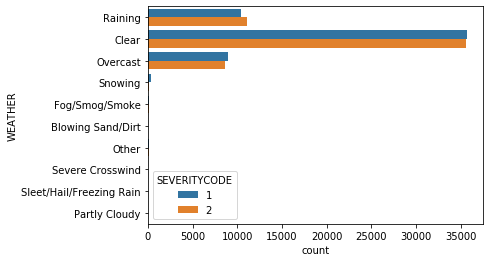

In [25]:
ax = sns.countplot(y="WEATHER", hue="SEVERITYCODE", data=df3)

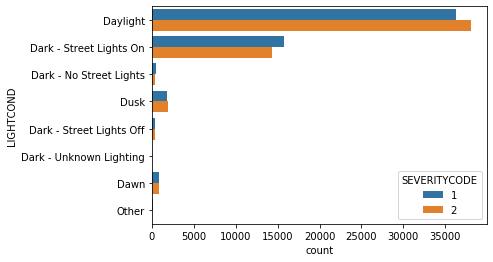

In [26]:
ax = sns.countplot(y="LIGHTCOND", hue="SEVERITYCODE", data=df3)

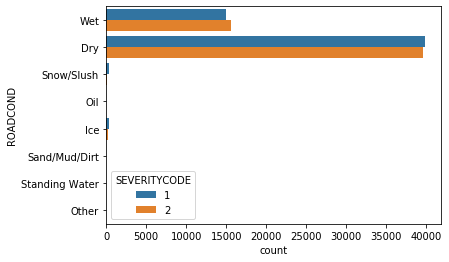

In [27]:
ax = sns.countplot(y="ROADCOND", hue="SEVERITYCODE", data=df3)

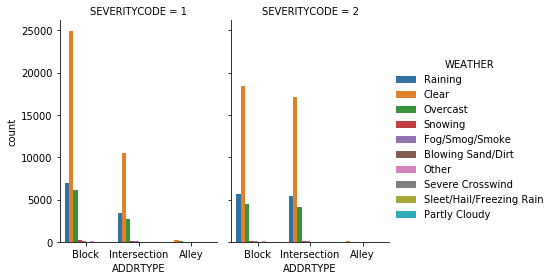

In [28]:
g = sns.catplot(x="ADDRTYPE", hue="WEATHER", col="SEVERITYCODE",
                data=df3, kind="count",
                height=4, aspect=.7);

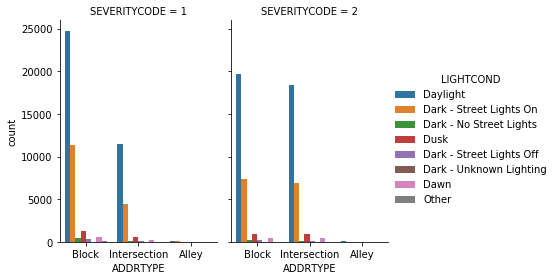

In [29]:
g = sns.catplot(x="ADDRTYPE", hue="LIGHTCOND", col="SEVERITYCODE",
                data=df3, kind="count",
                height=4, aspect=.7);

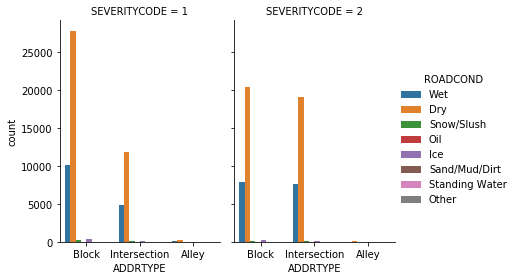

In [30]:
g = sns.catplot(x="ADDRTYPE", hue="ROADCOND", col="SEVERITYCODE",
                data=df3, kind="count",
                height=4, aspect=.7);

Prediction Model

One hot encoding (converting categorical values to numerical values)

In [31]:
df3["ADDRTYPE"] = df3["ADDRTYPE"].astype('category')

In [32]:
df3["ADDRTYPE_CAT"] = df3["ADDRTYPE"].cat.codes

In [33]:
df3["WEATHER"] = df3["WEATHER"].astype('category')

In [34]:
df3["WEATHER_CAT"] = df3["WEATHER"].cat.codes

In [35]:
df3["LIGHTCOND"] = df3["LIGHTCOND"].astype('category')

In [36]:
df3["LIGHTCOND_CAT"] = df3["LIGHTCOND"].cat.codes

In [37]:
df3["ROADCOND"] = df3["ROADCOND"].astype('category')

In [38]:
df3["ROADCOND_CAT"] = df3["ROADCOND"].cat.codes

In [40]:
df4 = df3.drop(columns = ['ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND'])

In [42]:
df4.head()

,SEVERITYCODE,ADDRTYPE_CAT,WEATHER_CAT,LIGHTCOND_CAT,ROADCOND_CAT
0,1,1,6,5,7
1,1,1,1,5,0
2,1,1,1,5,0
3,1,1,1,5,0
4,1,1,1,5,0


In [43]:
df4.dtypes

SEVERITYCODE     int64
ADDRTYPE_CAT      int8
WEATHER_CAT       int8
LIGHTCOND_CAT     int8
ROADCOND_CAT      int8
dtype: object

In [44]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111414 entries, 0 to 111413
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   SEVERITYCODE   111414 non-null  int64
 1   ADDRTYPE_CAT   111414 non-null  int8 
 2   WEATHER_CAT    111414 non-null  int8 
 3   LIGHTCOND_CAT  111414 non-null  int8 
 4   ROADCOND_CAT   111414 non-null  int8 
dtypes: int64(1), int8(4)
memory usage: 1.3 MB


Feature set - X

In [45]:
Feature = df4[['ADDRTYPE_CAT','WEATHER_CAT','LIGHTCOND_CAT','ROADCOND_CAT']]
Feature.head()
X = Feature
X[0:5]

,ADDRTYPE_CAT,WEATHER_CAT,LIGHTCOND_CAT,ROADCOND_CAT
0,1,6,5,7
1,1,1,5,0
2,1,1,5,0
3,1,1,5,0
4,1,1,5,0


Labels

In [46]:
Y = df4['SEVERITYCODE'].values
Y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

Normalization of data

In [47]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.78936715,  1.67946553,  0.59533255,  1.61357969],
       [-0.78936715, -0.71057727,  0.59533255, -0.62623701],
       [-0.78936715, -0.71057727,  0.59533255, -0.62623701],
       [-0.78936715, -0.71057727,  0.59533255, -0.62623701],
       [-0.78936715, -0.71057727,  0.59533255, -0.62623701]])

Split of data - 20% for test data and the rest for training data

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (89131, 4) (89131,)
Test set: (22283, 4) (22283,)


We will use K-Nearest Neighbor, Decision tree and Logistic Regression for our machine learnings to predict the severity.

K-Nearest Neighbor

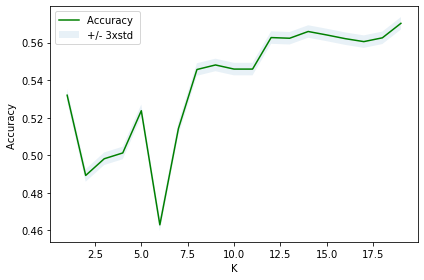

The best accuracy was with 0.5703002288740295 with k= 19


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

for n in range(1,Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)  
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('K')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [50]:
model_KNN = KNeighborsClassifier(n_neighbors=19)
model_KNN.fit(X_train,Y_train)
model_KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
model_DecisionTree.fit(X_train,Y_train)
model_DecisionTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(C=0.01,solver='liblinear')
model_LR.fit(X_train,Y_train)
model_LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Model Evaluation using Test set

In [54]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [55]:
yhat_knn = model_KNN.predict(X_test)
jaccard_knn = jaccard_similarity_score(Y_test, yhat_knn)
f1_score_knn = f1_score(Y_test, yhat_knn, average='weighted')

C:\Users\AxundzaE\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [56]:
yhat_dt = model_DecisionTree.predict(X_test)
jaccard_dt = jaccard_similarity_score(Y_test, yhat_dt)
f1_score_dt = f1_score(Y_test, yhat_dt, average='weighted')

C:\Users\AxundzaE\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [57]:
yhat_lg = model_LR.predict(X_test)
yhat_lg_prob = model_LR.predict_proba(X_test)
jaccard_lg = jaccard_similarity_score(Y_test, yhat_lg)
f1_score_lg = f1_score(Y_test, yhat_lg, average='weighted')
logloss_lg = log_loss(Y_test, yhat_lg_prob)

C:\Users\AxundzaE\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


Result

In [58]:
report = pd.DataFrame(data=np.array([["KNN", round(jaccard_knn,4), round(f1_score_knn,4), "NA"],
                                     ["Decision Tree", round(jaccard_dt,4), round(f1_score_dt,4), "NA"],
                                    ["LogisticRegression", round(jaccard_lg,4), round(f1_score_lg,4), round(logloss_lg,4)]]), 
                      columns=["Algorithm", "Jaccard", "F1-score", "LogLoss"])
report = report.set_index(["Algorithm", "Jaccard", "F1-score", "LogLoss"])
report

,,,
Algorithm,Jaccard,F1-score,LogLoss
KNN,0.5703,0.5635,NA
Decision Tree,0.5896,0.5844,NA
LogisticRegression,0.5896,0.5845,0.675


We have plotted the results of our model evaluation using the test data. The accuracy of the Logistic Regression is based on the Logistic Loss (0.675). The result is not good as we expected because the accuracy of the models is not very high.

Discussion

We have selected the collision address type, the weather condition, the road condition and the light condition as our independent variables to predict the severity of a collision. Most of the collisions occurs on the following conditions: clear weather, dry road and daylight. Moreover, there are more severity code 1 collisions along Blocks than on Intersections. And, the collisions of severity code 2 is almmost the same on both Block and Intersections. 